<a href="https://colab.research.google.com/github/sipocz/timeSeries/blob/main/Gozfogyaszt%C3%A1s_SZ3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

#file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'


In [7]:
df=pd.DataFrame()

In [8]:
df["goz"]=[1346,1337,1307,999,773,645,438,60,548,926,1149,1192,1290,1154,1120,806,534,461,291,44,361,528,825]
df["temp"]=[19.63,18.72,15.18,12.45,7.19,0,0,0,5.45,11.37,15.67,19.87,19.71,16.31,15.18,11.6,3.42,0,0,0,8.64,8.73,16]
df["N2"]=[57268,60648,82514,68912,70189,51362,44094,12459,63036,50915,50915,35000,57268,60648,82514,68912,70189,51362,44094,12459,63036,50915,50915]
df["color"]=["r","r","r","r","r","r","r","r","r","r","r","r","y","y","y","b","b","b","b","b","b","b","b"]


In [9]:
df

,goz,temp,N2,color
0,1346,19.63,57268,r
1,1337,18.72,60648,r
2,1307,15.18,82514,r
3,999,12.45,68912,r
4,773,7.19,70189,r
5,645,0.00,51362,r
6,438,0.00,44094,r
7,60,0.00,12459,r
8,548,5.45,63036,r
9,926,11.37,50915,r


In [10]:
colorx=df["color"]

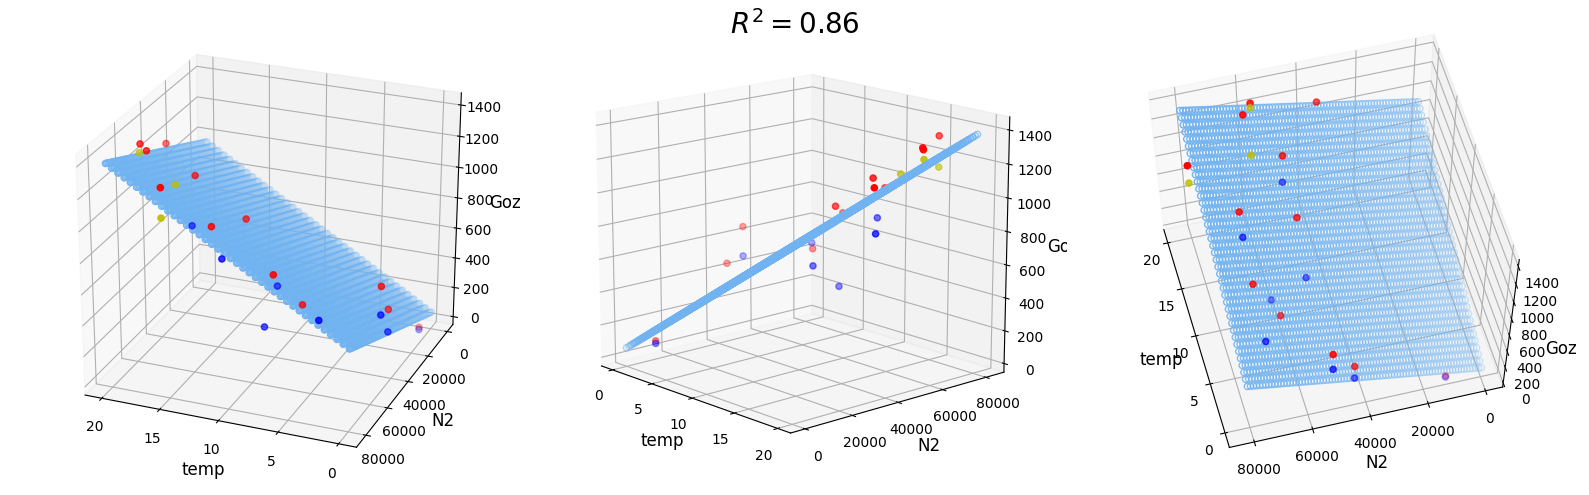

In [11]:


X = df[['temp', 'N2']].values.reshape(-1,2)
Y = df['goz']


x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 20, 40)      # range of temp
y_pred = np.linspace(0, 80000, 80)  # range of N2
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)



r2 = model.score(X, Y)



plt.style.use('default')

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    #ax.plot(x, y, z, color="k", zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.scatter(x,y,z,c=colorx)
    ax.set_xlabel('temp', fontsize=12)
    ax.set_ylabel('N2', fontsize=12)
    ax.set_zlabel('Goz', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-42)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()